# Problem 3: Google Playstore Apps Dataset
### Given an Excel data file as represented by the sample file GooglePlaystore.xlsx (10K records), load it into a Pandas DataFrame (use the Pandas read_excel method), and perform the following tasks on it.

### Importing Libraries

In [494]:
# importing libraries

import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

### Loading data in to pandas Dataframe variable df

In [495]:
df = pd.read_excel('GooglePlaystore.xlsx')
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up


## Preprocessing


### 1. Often there are outliers which do not match the overall data type. There is one record in this data where the "Reviews" has value "3.OM" which does not match the rest of the data. Remove that record.

In [496]:
df.shape #Checking size of dataframe before removing row with non matching value

(10841, 13)

In [497]:
df.drop(df.loc[df['Reviews']=="3.0M"].index, inplace=True)

In [498]:
df.shape #Checking size of dataframe after removing row with non matching value

(10840, 13)

### 2. Remove rows where any of the columns has the value "Varies with device"

In [499]:
df =  df[(df.iloc[:,:] != 'Varies with device').all(axis=1)]

In [500]:
df.shape #Checking size of dataframe after removing rows with 'Varies with device'

(9059, 13)

### 3. The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie, the words " and up"), so the result is a number. If there are multiple decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). For example, the value "4.1 and up" should be changed to "4.1". The value "4.5.6 and up" should be changed to "4.5". The value "5.6.7" should be changed to "5.6". If there is a range (eg. 5.0 -8.0), only consider the first number. For example, the value "5.0 - 8.0" should be changed to "5.0". The value "4.0.3 - 7.1.1" should be changed to "4.0".


Removing unwanted part of string

In [501]:
df = df[df['Android Ver'].notna()]

In [502]:
df['Android Ver'] = df['Android Ver'].str[:3] 

Changing Data type to float

In [503]:
df['Android Ver'] = pd.to_numeric(df['Android Ver'])

In [504]:
df['Android Ver']

0        4.0
1        4.0
2        4.0
4        4.4
5        2.3
        ... 
10834    4.1
10835    4.0
10836    4.1
10837    4.1
10838    2.2
Name: Android Ver, Length: 9057, dtype: float64

### 4. The "Installs" column must have integer values. For values that have commas, remove the commas. For values that have a '+' at the end, remove the '+'. Keep only those rows that have an integer value after these edits.

In [505]:
# Removing "," and "+" from Installs column
df['Installs']= df['Installs'].str.rstrip('+') # using rstrip method as it is not a string but a series
df['Installs'] = df['Installs'].replace(',','',regex=True)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6M,50000,Free,0.0,Everyone,Art & Design,2017-03-26 00:00:00,1.0,2.3


In [506]:
df['Installs'] =df['Installs'][pd.to_numeric(df['Installs'], errors='coerce').notnull()]
df['Installs']


0          10000
1         500000
2        5000000
4         100000
5          50000
          ...   
10834        500
10835         10
10836       5000
10837        100
10838       1000
Name: Installs, Length: 9057, dtype: object

### 5. For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row.

In [507]:
#Checking total number of NaN values
df["Rating"].isnull().sum(axis = 0) 

1416

In [508]:
# Applying conditional criteria for removal of NaN rows
conditions = (df['Reviews'] <100) & ((pd.to_numeric(df['Installs'])) <50000) &(df['Rating'].isna())
df = df[~conditions]

In [509]:
#Checking total number of NaN values after applying conditional removal of rows
df["Rating"].isnull().sum(axis = 0) 

42

Calculating Average of Ratings

In [510]:
mean = float(df['Rating'].mean())
mean = mean.__round__(2)
mean

4.17

In [511]:
#Replacing remaining NaN values with mean
df['Rating'].fillna(mean, inplace=True)

In [512]:
#Checking total number of NaN values after replacing NaN with mean
df["Rating"].isnull().sum(axis = 0) 

0

### 6. Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.



In [513]:
df['Size'] =df['Size'].replace({'k': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600000,50000,Free,0.0,Everyone,Art & Design,2017-03-26 00:00:00,1.0,2.3


## Analysis

### 1. Describe (use DataFrame describe method) the category wise rating statistics. In other words, for each category, describe the statistics (count, mean, etc.) for ratings in that category.

Converting Object Columns to Float for Statistical Analysis

In [514]:
df['Reviews'] = df['Reviews'].astype(float, errors = 'raise')
df['Installs'] = df['Installs'].astype(float, errors = 'raise')
df['Price'] = df['Price'].astype(float, errors = 'raise')

In [515]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Android Ver
count,7683.000000,7.683000e+03,7.683000e+03,7.683000e+03,7683.000000,7683.000000
mean,4.172334,2.926510e+05,2.285609e+07,8.117426e+06,1.130859,3.851751
std,0.544618,1.867561e+06,2.340173e+07,4.926430e+07,17.452583,0.852644
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000,1.000000
25%,4.000000,1.050000e+02,5.200000e+06,1.000000e+04,0.000000,4.000000
50%,4.300000,2.171000e+03,1.400000e+07,1.000000e+05,0.000000,4.100000
75%,4.500000,3.724500e+04,3.300000e+07,1.000000e+06,0.000000,4.200000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000,8.000000


### 2. Extract all "Free" apps from the master data frame. 
Then write a function that, given a numeric column e.g 'Rating'), will create and return a dataframe for the top 3 free applications in each category based on that column. Call the function on each of these
columns:
a. Rating (gives top 3 most highly rated applications in each category)
b. Installs (gives top 3 most installed applications in each category)
C. Reviews (gives top 3 most reviewed applications in each category)

In [516]:
# Creating new dataframe of Free apps
df_free = df.loc[df['Price'] == 0]

In [517]:
# Finding unique categories
categories = df_free['Category'].unique() 
categories

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [518]:
# get dataframe sorted by Numeric Column in each Category 
def get_dataframe_of_top_3_free_apps(column):
    grouped = df_free.groupby(["Category"]).apply(lambda x: x.sort_values([column], ascending = False)).reset_index(drop=True)
    # select top 3 rows within each Category
    df_new = grouped.groupby('Category').head(3)
    return df_new
    
numeric_column = ["Rating","Installs","Reviews"] # Numeric columns
df_analysis=[] # Collection of Dataframes 
for column in range(len(numeric_column)):
    df_analysis.append(get_dataframe_of_top_3_free_apps(numeric_column[column]))
    


In [519]:
df_analysis[0][["App","Category","Rating"]] # Numeric Column = Rating

,App,Category,Rating
0,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0
1,Fantasy theme dark bw black building,ART_AND_DESIGN,4.8
2,Cardi B Wallpaper,ART_AND_DESIGN,4.8
56,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9
57,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9
...,...,...,...
6955,Video Downloader - for Instagram Repost App,VIDEO_PLAYERS,4.8
6956,AJ Player,VIDEO_PLAYERS,4.8
7067,Weather forecast,WEATHER,4.8
7068,Live Weather Pro,WEATHER,4.8


In [520]:
df_analysis[1][["App","Category","Installs"]] # Numeric Column = Installs

,App,Category,Installs
0,ibis Paint X,ART_AND_DESIGN,10000000.0
1,Tattoo Name On My Photo Editor,ART_AND_DESIGN,10000000.0
2,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,10000000.0
56,AutoScout24 - used car finder,AUTO_AND_VEHICLES,10000000.0
57,Fines of the State Traffic Safety Inspectorate...,AUTO_AND_VEHICLES,5000000.0
...,...,...,...
6955,Dubsmash,VIDEO_PLAYERS,100000000.0
6956,LIKE – Magic Video Maker & Community,VIDEO_PLAYERS,50000000.0
7067,Weather & Clock Widget for Android,WEATHER,50000000.0
7068,Amber Weather,WEATHER,10000000.0


In [521]:
df_analysis[2][["App","Category","Reviews"]] # Numeric Column = Reviews

,App,Category,Reviews
0,ibis Paint X,ART_AND_DESIGN,224399.0
1,FlipaClip - Cartoon animation,ART_AND_DESIGN,194216.0
2,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,174531.0
56,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,197136.0
57,AutoScout24 - used car finder,AUTO_AND_VEHICLES,186648.0
...,...,...,...
6955,"DU Recorder – Screen Recorder, Video Editor, Live",VIDEO_PLAYERS,2588730.0
6956,Dubsmash,VIDEO_PLAYERS,1971777.0
7067,Weather & Clock Widget for Android,WEATHER,2371543.0
7068,Amber Weather,WEATHER,260137.0


### 3. Find the average, maximum and minimum price of the paid applications

In [522]:
# Creating new dataframe of Paid apps
df_paid = df.loc[df['Price'] != 0]
print('Minimum price of the paid app is: ',min(df_paid['Price']))
print('Maximum price of the paid app is: ',max(df_paid['Price']))
print('Average price of paid apps is: ',df_paid['Price'].mean())



Minimum price of the paid app is:  0.99
Maximum price of the paid app is:  400.0
Average price of paid apps is:  15.162984293193576


## Visualization

###  1. In the genre column, break the string of genres into a list. For example, 'Art &amp; Design, Creativity' should be ['Art &amp; Design', Creativity').
Count the number of applications per genre and display it using a pie chart. Hint: Read about DataFrame.explode()

In [523]:
df['Genres'] = df['Genres'].str.split(';') # Breaking string in to array
df = df.explode('Genres') # exploding dataframe to have 1 genre per row
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000,500000.0,Free,0.0,Everyone,Art & Design,2018-01-15 00:00:00,2.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000,500000.0,Free,0.0,Everyone,Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000,100000.0,Free,0.0,Everyone,Art & Design,2018-06-20 00:00:00,1.1,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3.8,1195.0,582000,100000.0,Free,0.0,Everyone,Weather,2014-02-16 00:00:00,6.0,2.1
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,619000,1000.0,Free,0.0,Everyone,Books & Reference,2014-03-23 00:00:00,0.8,2.2
10834,FR Calculator,FAMILY,4.0,7.0,2600000,500.0,Free,0.0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000,5000.0,Free,0.0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1


In [526]:
# Finding unique genres
genres = df['Genres'].unique() 
genres

array(['Art & Design', 'Pretend Play', 'Creativity', 'Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Communication', 'Dating', 'Education', 'Brain Games',
       'Entertainment', 'Music & Video', 'Events', 'Finance',
       'Food & Drink', 'Health & Fitness', 'House & Home',
       'Libraries & Demo', 'Lifestyle', 'Adventure', 'Arcade', 'Casual',
       'Card', 'Strategy', 'Action', 'Puzzle', 'Sports', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music', 'Music & Audio', 'Video Players & Editors', 'Medical',
       'Social', 'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [529]:
apps_per_category = df.groupby('Genres').size()
apps_per_category

Genres
Action                     330
Action & Adventure         116
Adventure                   82
Arcade                     196
Art & Design                62
Auto & Vehicles             62
Beauty                      40
Board                       55
Books & Reference          149
Brain Games                 61
Business                   246
Card                        41
Casino                      31
Casual                     229
Comics                      49
Communication              210
Creativity                  31
Dating                     174
Education                  585
Educational                 97
Entertainment              474
Events                      36
Finance                    263
Food & Drink                86
Health & Fitness           222
House & Home                58
Libraries & Demo            68
Lifestyle                  280
Maps & Navigation           94
Medical                    321
Music                       18
Music & Audio                1
M

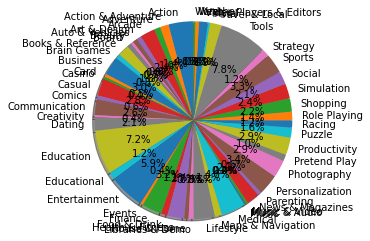

In [531]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = apps_per_category.keys()

fig1, ax1 = plt.subplots()
ax1.pie(apps_per_category, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### 2. Display a box plot of ratings for Business" and "Education" categories. The boxplots should be in the same plot.

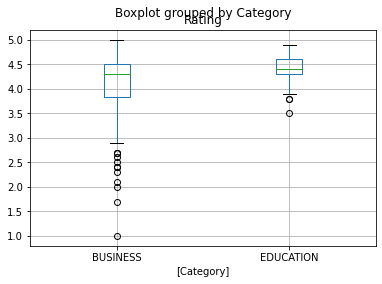

In [550]:
# Creating new dataframe of Category = Business and Education

categories = ['BUSINESS', 'EDUCATION']
  
# selecting rows based on condition
df_business_education = df.loc[df['Category'].isin(categories)]
df_business_education = df_business_education[['Category', 'Rating']]
boxplot = df_business_education.boxplot(column=['Rating'], by = ['Category'])